In [23]:
from keras.applications.vgg19 import VGG19
from imagenet_utils import decode_predictions, preprocess_input
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image
import requests

%matplotlib inline

In [2]:
model = VGG19()

In [24]:
image_url = 'https://i.ytimg.com/vi/SfLV8hD7zX4/maxresdefault.jpg'

In [25]:
img_data = requests.get(image_url).content
with open('image_name.jpg', 'wb') as handler:
    handler.write(img_data)

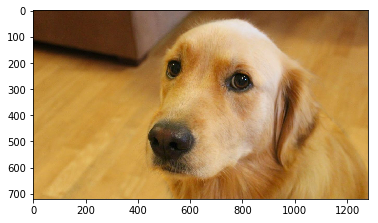

Input image shape: (1, 224, 224, 3)
Predicted:


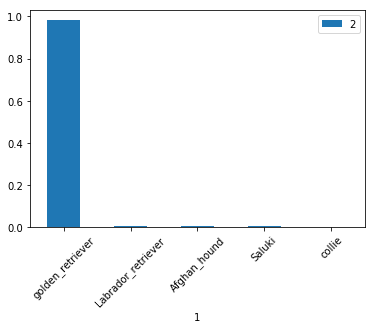

In [26]:
img_path = 'image_name.jpg'
plt_img = mpimg.imread(img_path)
plt.imshow(plt_img)
plt.show()
x = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)
print('Predicted:' )
df = pd.DataFrame(decode_predictions(preds)[0]).set_index(1)
df.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()